# Gerardo de Miguel González

## Práctica 2 de Estadística para Data Science

### Problema 1 

*Considera un examen de 10 preguntas con 5 posibles respuestas para cada pregunta en el que se responde al azar. Considera la variable aleatoria X =número de preguntas acertadas en el examen.*

**::GMG::** El problema que se plantea es un problema en el que se *una persona* realiza **10 experimentos** (responder cada una de las preguntas del examen) en *cada uno* de los cuales puede tener éxito (acertar la pregunta) o no (fallar).

La **variable aleatoria discreta** que se asigna para modelar el resultado global es el *número de preguntas acertadas* (número de éxitos). Individualmente cada pregunta tiene **5 posibles respuestas**, *una de las cuales* es la correcta por lo que la probabilidad de acertar (éxito) una pregunta es: 

$p = 1/5$

Dentro del marco de la *teoría de probabilidad* y las *variables aleatorias discretas* cada pregunta del examen es un **experimento de Bernoulli** con probabilidad de éxito `p` que es repetido *10 veces* de forma *independiente* y en el que modelamos el número de sucesos (preguntas acertadas) durante los 10 experimentos como una variable aleatoria `X` que es un **experimento binomial**.

Por lo tanto vamos a usar una **distribución binomial** para modelar y hacer los cálculos.

**::GMG::** Referencias

- 4.3. Distribución de Bernoulli y 4.4. Distribución binomial en apuntes de estadística (pdf) pp. 27-28
- distribuciones.R (script)
- [Comandos de R](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/Binomial.html): dbinom (pmf), pbinom (cdf), qbinom ($cdf^{-1}$)

i) ¿Cuánto valen E(X) y SD(X)?

**::GMG::** Lo tenemos ya calculado en los apuntes pp. 28

$$E(X) = np$$

$$Var(X) = np(1 - p)$$

y por definición pp. 21:

$$E \left( X \right) = \sum_{k=1}^\infty x_i p \left( x_i \right)$$

$$Var \left( X \right) =  E \left( X^2 \right) - \left( E \left( X \right) \right)^2$$

$$SD \left( X \right) = \sqrt {Var \left( X \right)}$$

In [1]:
#::GMG::Directamente con las fórmulas de los apuntes
# número de experimentos de Bernoulli
n <- 10
# Probabilidad de éxito por pregunta
p <- 1/5
# E(X)
E.X <-  n * p
# Var(X)
Var.X <- n * p * (1-p)
SD.X = sqrt(Var.X)
paste('E(X)=', E.X)
paste('SD(X)=',round(SD.X,3))

[1] "E(X)= 2"

[1] "SD(X)= 1.265"

In [2]:
#::GMG::Si aplicamos la definición de E(X) y SD(X) también se puede calular con R porque es
#       un sumatorio, i.e. sum() y tenemos la pmf p(x) que es dbinom()
exitos <- 0:10
E.X.2 <- sum(exitos*dbinom(x = exitos,size = n,prob = p))
paste('E(X)=', E.X.2)
Var.X.2 <- sum(exitos^2*dbinom(x = exitos,size = n,prob = p)) -
           E.X.2^2
paste('SD(X)=',round(sqrt(Var.X.2),3))

[1] "E(X)= 2"

[1] "SD(X)= 1.265"

ii) Calcula la probabilidad de acertar 0, 1, 2, ..., 10 preguntas. ¿Cuánto vale la suma de las
once probabilidades que acabas de calcular?

**::GMG::** Conceptualmente en una distribución discreta como la binomial se puede calcular la probabilidad de un evento discreto con la `pmf`:

$$P \left(X = x_i \right) = dbinom \left( x =  x_i, size = 10, prob = 1/5 \right)$$ 

y la suma de probabilidades hasta un evento dado es la probabilidad de que todos los eventos hasta ese incluido se haya producido y se puede calcular con la `cdf`:

$$P \left(X \leq x_i \right) = pbinom \left( x = x_i, size = 10, prob = 1/5 \right)$$

La suma de las probabilidades de *todos* los eventos $x_i = \{0,1,2,...10\}$ tiene que dar **1**. Si se hace con `pmf` y `sum()` o `cdf` tiene dar *lo mismo*.

In [3]:
#::GMG::calculamos las probabilidades de eventos individuales
probabilidades <- dbinom(x = exitos,size = n,prob = p)

In [4]:
# https://stackoverflow.com/questions/4071586/printing-newlines-with-print-in-r
print(paste('p(x =',exitos,'):',probabilidades))

 [1] "p(x = 0 ): 0.1073741824"         "p(x = 1 ): 0.268435456"         
 [3] "p(x = 2 ): 0.301989888"          "p(x = 3 ): 0.201326592"         
 [5] "p(x = 4 ): 0.088080384"          "p(x = 5 ): 0.0264241152"        
 [7] "p(x = 6 ): 0.005505024"          "p(x = 7 ): 0.000786432"         
 [9] "p(x = 8 ): 7.37280000000002e-05" "p(x = 9 ): 4.09599999999999e-06"
[11] "p(x = 10 ): 1.024e-07"          


In [5]:
#::GMG::La suma de las probabilidades de todos los eventos es 1
suma <- sum(probabilidades)
paste('La suma p(x_i) es:', suma)

[1] "La suma p(x_i) es: 1"

In [6]:
#::GMG::Cálculo directo con la cdf
probabilidad <- pbinom(q = 10,size = n,prob = p)
paste('La probabilidad p(X <= 10) es:', probabilidad)

[1] "La probabilidad p(X <= 10) es: 1"

iii) Calcula las probabilidades acumuladas, es decir la probabilidad de obtener 0 aciertos o
menos, 1 acierto o menos, 2 aciertos o menos ... 10 aciertos o menos.

In [7]:
#::GMG:: uso la cdf aquí para todos los eventos
p.acumuladas <- pbinom(q = exitos,size = n,prob = p)
print(paste('p(x <=',exitos,'):',p.acumuladas))

 [1] "p(x <= 0 ): 0.1073741824" "p(x <= 1 ): 0.3758096384"
 [3] "p(x <= 2 ): 0.6777995264" "p(x <= 3 ): 0.8791261184"
 [5] "p(x <= 4 ): 0.9672065024" "p(x <= 5 ): 0.9936306176"
 [7] "p(x <= 6 ): 0.9991356416" "p(x <= 7 ): 0.9999220736"
 [9] "p(x <= 8 ): 0.9999958016" "p(x <= 9 ): 0.9999998976"
[11] "p(x <= 10 ): 1"          


iv) Representa las probabilidades de los apartados anteriores en una gráfica con dos paneles. Guarda la figura en un archivo. ¿Cuál es el número de aciertos más probable?

**::GMG::** El número de aciertos más probable es **2** que coincide con $E \left( X \right)$

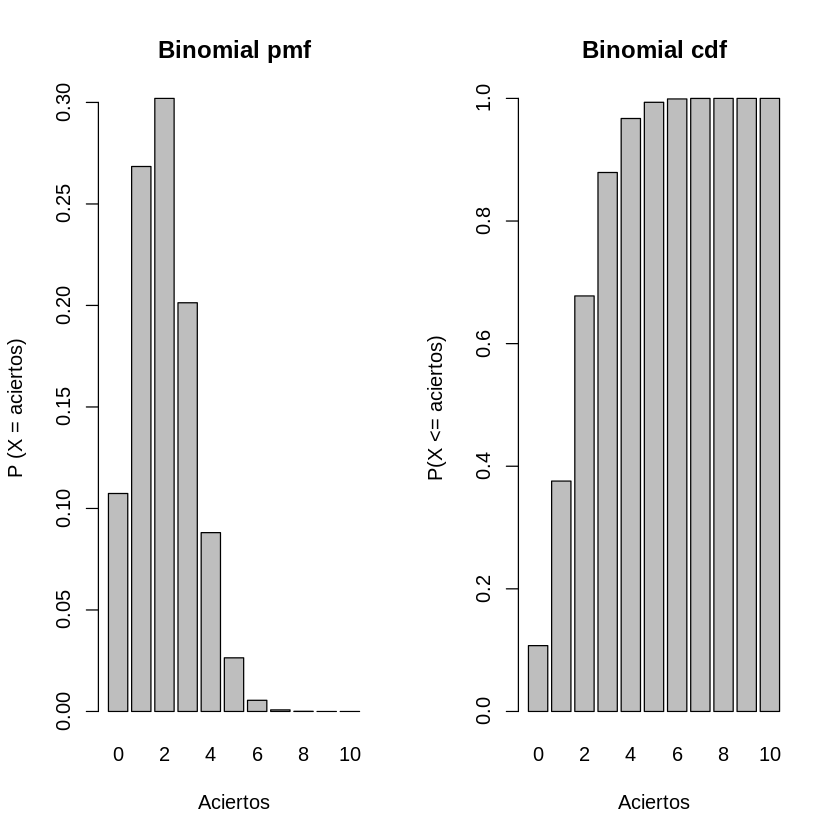

In [8]:
#::GMG::Hemos aprendido en clase que para representar valores discretos de forma gráfica
#       tenemos barplot
# https://stackoverflow.com/questions/17759540/r-graph-of-binomial-distribution
par(mfrow=c(1,2))
barplot(probabilidades, names.arg = exitos, 
        xlab = "Aciertos", 
        ylab = "P (X = aciertos)", 
        main = "Binomial pmf")
barplot(p.acumuladas, names.arg = exitos, 
        xlab = "Aciertos", 
        ylab = "P(X <= aciertos)", 
        main = "Binomial cdf")

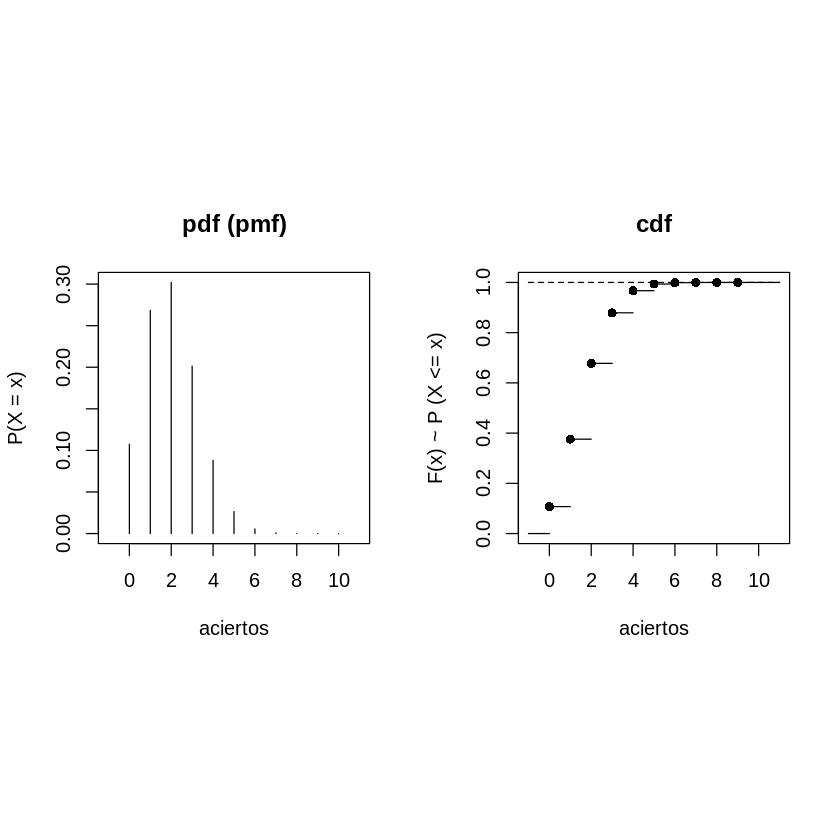

In [10]:
#::GMG::No obstante he visto también que se hacen gráficos de líneas con plot() lines()
#       y segment()
# Por ejemplo en pp. 118
# https://books.google.es/books/about/Probability_and_Statistics_with_R.html?id=4acZAQAAIAAJ&source=kp_book_description&redir_esc=y
par(mfrow = c(1,2), pty = 's')
plot(exitos,dbinom(x = exitos,size = n,prob = p), type = 'h', 
     xlab = 'aciertos', ylab = 'P(X = x)',
     xlim = c(-1,length(exitos)),
     main = 'pdf (pmf)'
    )
plot(exitos,pbinom(q = exitos,size = n,prob = p), type = 'n',
     xlab = 'aciertos', ylab = 'F(x) ~ P (X <= x)',
     xlim = c(-1,length(exitos)), ylim = c(0,1),
     main = 'cdf'
    )
segments(-1,0,0,0)
segments(exitos, pbinom(q = exitos,size = n,prob = p),
         exitos + 1, pbinom(q = exitos,size = n,prob = p))
lines(exitos[-length(exitos)], 
      pbinom(q = exitos[-length(exitos)],size = n,prob = p),
      type = 'p', pch = 16)
segments(-1,1,length(exitos),1, lty = 2)

## Problema 2 

*En el archivo GOT.txt figura el número de muertes por cada uno de los 67 primeros capítulos de la serie Juego de Tronos.*

In [2]:
#::GMG::Cargo el dataset para trabajar con él
headers = read.csv(file = 'GOT.txt',  skip = 0, header = FALSE, 
                   nrows = 1, as.is = TRUE, strip.white = TRUE, 
                   sep = ' ')
got <- read.csv(file = 'GOT.txt', skip = 1, header = FALSE, sep = ' ')
colnames(got)= headers

In [3]:
print(paste(class(got),'with',ncol(got),'columns and',nrow(got),'rows.'))
print('Description:')
str(got)

[1] "data.frame with 3 columns and 67 rows."
[1] "Description:"
'data.frame':	67 obs. of  3 variables:
 $ Season   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Episode  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ NumDeaths: int  4 3 0 1 5 4 2 7 2 3 ...


i) Razona qué distribución usarías para calcular probabilidades asociadas a esta variable. Representa gráficamente los datos correspondientes al número de muertes de forma que te ayude a decidir qué distribución usar.

**::GMG::** Razonamiento 

La serie tiene unos personajes que evolucionan según una trama que es contada en periodos de tiempo llamados *episodios* (`Episode`), agrupados a su vez en periodos de tiempo mayores llamados *temporadas* (`Season`). Un *personaje* puede estar vivo o muerto. Podemos pensar en la *muerte* de un personaje de la serie como un *evento* que podemos **contar** dentro de un periodo especificado (`Episode`,`Season`). Tenemos la cuenta por episodio en el dataset (`numDeaths`) y podemos derivar también la cuenta por temporada. 

La *cuenta* se puede modelar como una *variable discreta* con su correspondiente *pmf* y *cdf*. Si quiero asignar (*fit*) una *pmf* (*cdf*) determinada tendré que hacer una serie de asunciones (*assunptions*) sobre el *proceso* que genera los datos del dataset. Esas asunciones tendrían que ser *validadas* de alguna manera.

**::DUDAS::** ¿Qué maneras hay de validar unas asunciones sobre el proceso/distribución de la variable(s) aleatoria(s) con la(s) que se modela un dataset?

El capítulo (*episode*) es un *periodo de tiempo* en el que se puede producir el evento, i.e la muerte de un personaje. El evento puede ocurrir con una cadencia media *constante* y *independiente* del tiempo transcurrido desde el último evento (muerte de otro personaje) en el periodo considerado. Es decir, que la muerte de un personaje no debe afectar al tiempo que transcurra hasta que se produzca la muerte de otro personaje. 

En los apuntes (pp-28-29) se dice que:

> Una variable aleatoria de Poisson, X, expresa la probabilidad que un determinado número de eventos ocurran en un determinado intervalo de tiempo (o de espacio), dada una frecuencia media conocida e independientemente del tiempo discurrido (o espacio recorrido) desde el último evento. Es importante recalcar que los sucesos han de ser independientes par que podamos aplicar la distribución de Poisson correctamente.

Con ese razonamiento podemos elegir como distribución de la variable aleatoria discreta "muertes por episodio" una (*pmf*) **distribución de Poisson**.

[Comandos de R](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/Poisson.html): `dpois`, `ppois`, `qpois`

In [5]:
muertes.observadas <- table(got$NumDeaths)
muertes.observadas


 0  1  2  3  4  5  6  7  8 10 11 
 5 12 13  9 13  7  2  2  2  1  1 

In [16]:
frecuencias.relativas <- round(muertes.observadas/sum(muertes.observadas),3)
frecuencias.relativas


    0     1     2     3     4     5     6     7     8    10    11 
0.075 0.179 0.194 0.134 0.194 0.104 0.030 0.030 0.030 0.015 0.015 

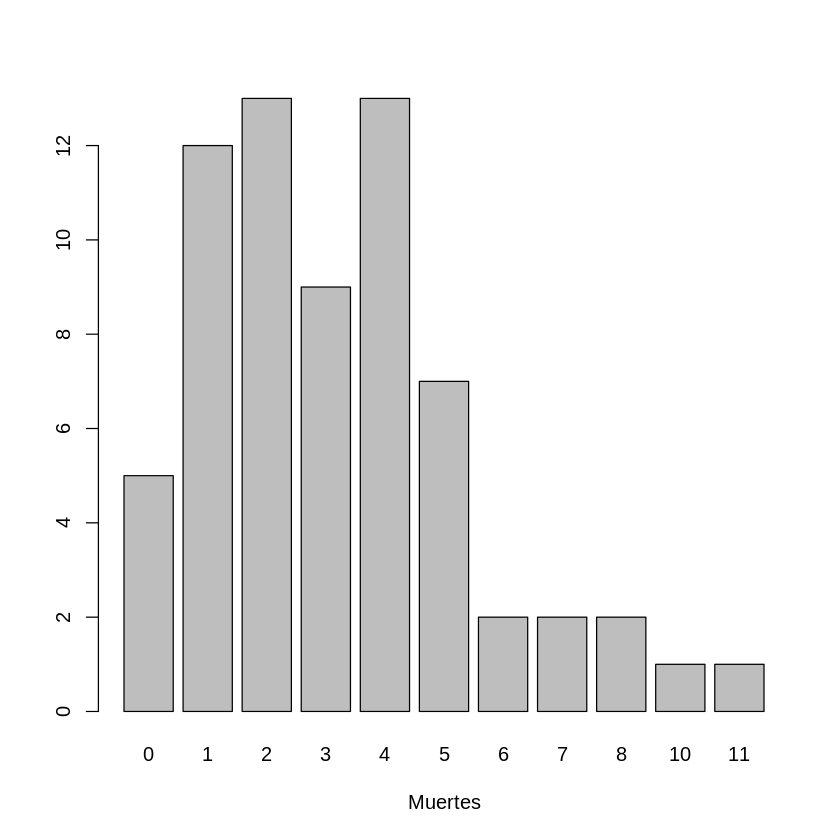

In [6]:
#::GMG::La representación gráfica es la de una variable discreta por lo que lo correcto es
#       utilizar un barplot en el que cada barra represente una cuenta de los episodios en los que
#       se produce un número determinado de muertes
barplot(height = muertes.observadas, xlab = 'Muertes')

**::DUDAS::** Se supone que la gráfica anterior debería *ayudar* a decidir qué distribución usar. No entiendo cómo se puede usar esa gráfica para tomar esa decisión. He visto en bibliografía ([Ugarte et.al](http://www.unavarra.es/personal/lugarte/libros.htm), pp. 121-126; pp.447-451) que se pueden expesar las asunciones sobre el proceso de poisson (*poisson process*) y hacer comprobaciones y test de hipótesis. He intentado reproducir la comprobación de alguna asunción aquí, pero no las sabría interpretar ahora ... 

In [8]:
#::GMG::test 1: the number of aoutcomes in non-overlapping intervals are independent
#       five lag correlation matrix by episode
#::nota::
LAG <- sapply(X = 1:5,FUN = function(x) {got$NumDeaths[x:(x+62)]})
round(cor(LAG),3)

1.000,0.133,-0.134,-0.240,-0.016
0.133,1.000,0.140,-0.126,-0.219
-0.134,0.140,1.000,0.141,-0.119
-0.240,-0.126,0.141,1.000,0.123
-0.016,-0.219,-0.119,0.123,1.000


In [8]:
#::GMG::No se cumple de forma empírica que la media y varianza sean similares como cabría esperar
#       en una muestra que fuera tomada de un proceso de poisson ...
media.muestral <- mean(got$NumDeaths)
varianza.muestral <- var(got$NumDeaths)
paste('Media:', media.muestral,' Varianza:',varianza.muestral)

[1] "Media: 3.2089552238806  Varianza: 5.41022161917684"

In [19]:
#::GMG::Aquí intentaba probar algo parecido a lo que explican aquí en el apatrado 8
# http://www.stats.ox.ac.uk/~marchini/teaching/L5/L5.notes.pdf
# y en pp. 123 de Ugarte et al. pero en su ejemplo la media y la varianza son parecidas (!)
#probabilidad.teorica <- round(dpois(x = 0:(length(muertes.observadas) -1),
#                                    lambda = media.muestral),3)
#valores.esperados <- round(probabilidad.teorica*67,0)
#tabla <- cbind(muertes.observadas, valores.esperados,
#               frecuencias.relativas, probabilidad.teorica)
#tabla

ii) Estima la probabilidad de que en el siguiente capítulo haya más de 5 muertes. Explica qué suposiciones has hecho. ¿Podría fallar alguna de las suposiciones?

In [9]:
#::GMG:: Estimamos con una distribución de posson con lambda = media muestral
# https://stat.ethz.ch/R-manual/R-devel/library/stats/html/Poisson.html
# P(x > 5) = 1 - P(x<=5) = 1 - ppois(5,lambda = media muestral)
mas.de.5 <- 1 - ppois(q = 5, lambda = media.muestral)
paste('Probabilidad de más de 5 muertes por episodio:', round(mas.de.5,3))

[1] "Probabilidad de más de 5 muertes por episodio: 0.106"

**::GMG::** Las suposiciones y asunciones las he expresado en el aprtado i). Yo creo que la suposición de la independencia de las muertes no se sostiene. Al ser unas muertes causadas en batallas por enfrentamientos entre clanes y enfrentamientos personales entre personajes planificados dentro de una trama escrita por temporada o episodio, las muertes tienen una *dependencia*. 

iii) Calcula la probabilidad de que en el siguiente capítulo haya exactamente 0, 1, 2, ..., 10 muertes. Representa las probabilidades en una gráfica.

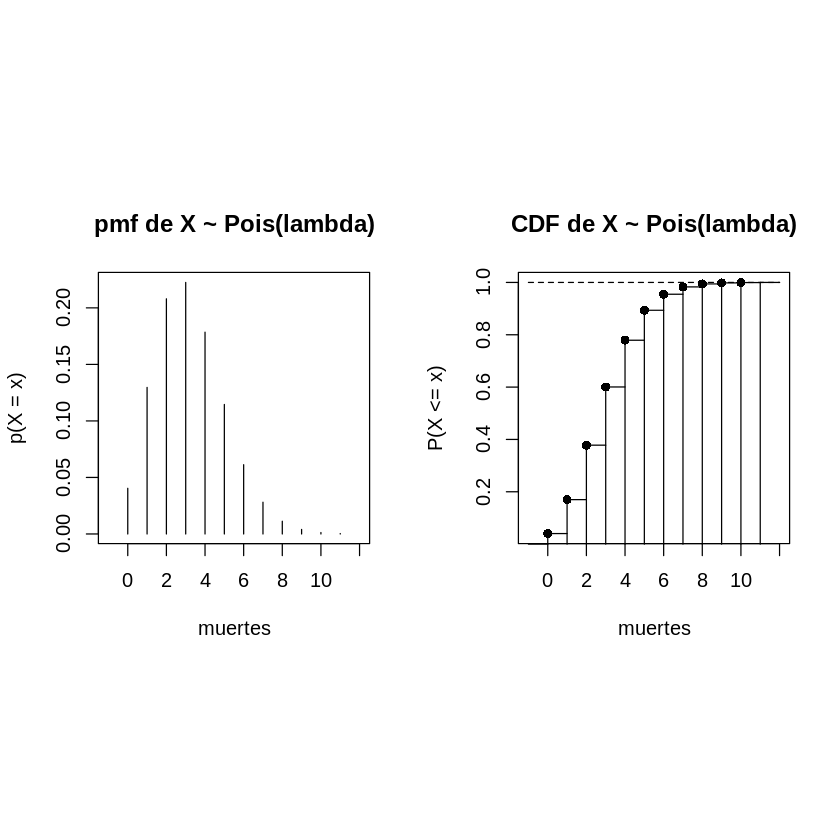

In [16]:
#::GMG:: Dibujamos las pmf y CDF de X ~ Pois(media.muestral)
#        Ugarte et al. pp. 123
par(mfrow = c(1,2), pty = 's')
plot(0:11, 
     dpois(0:11,media.muestral), 
     type = 'h', 
     xlab = 'muertes', 
     ylab = 'p(X = x)',
     xlim = c(-1,12),
     main = 'pmf de X ~ Pois(lambda)')
plot(0:11, 
     ppois(0:11,media.muestral), 
     type = 'h', 
     xlab = 'muertes', 
     ylab = 'P(X <= x)',
     xlim = c(-1,12),
     main = 'CDF de X ~ Pois(lambda)')
segments(-1,0,0,0)
segments(0:11,ppois(0:11,media.muestral), 1:12, ppois(0:11,media.muestral))
lines(0:10,ppois(0:10, media.muestral), type = 'p', pch=16)
segments(-1,1,12,1, lty=2)

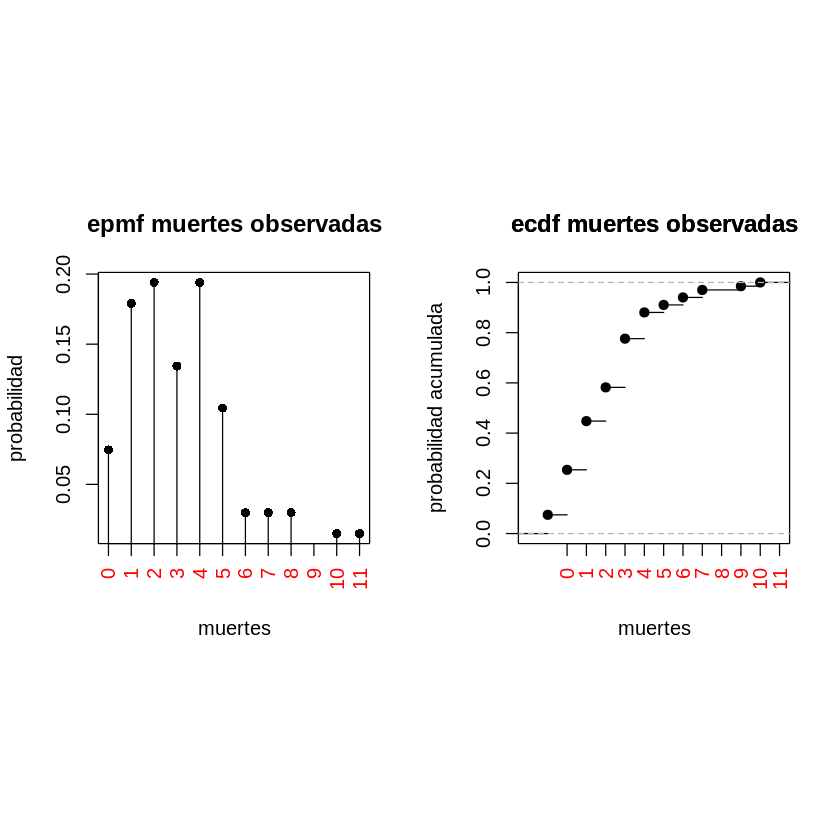

In [23]:
#::GMG:: Lo hago directamente de la muestra, osea la pmf "empírica" (?)
par(mfrow = c(1,2), pty = 's')
plot(seq(1,12,1), 
     as.vector(muertes.observadas[c(seq(1:9),12,10,11)]/sum(muertes.observadas)),
     type = 'p',
     xlab = 'muertes', ylab = 'probabilidad', xaxt='n',
     pch = 16)
axis(1,at=seq(1,12,1),labels=seq(0,11,1), col.axis="red", las=2)
lines(seq(1,12,1), 
      as.vector(muertes.observadas[c(seq(1:9),12,10,11)]/sum(muertes.observadas)),
      type = 'h')
title('epmf muertes observadas')
# https://cran.r-project.org/web/packages/IPSUR/vignettes/IPSUR.pdf
# 5.5 The Empirical Distribution
plot(ecdf(x = got$NumDeaths),
          xlab = 'muertes', ylab = 'probabilidad acumulada', 
          xaxt='n',
          main = 'ecdf muertes observadas')
#axis(1,at=seq(1,11,1),labels=c(0:8,10,11), col.axis="red", las=2)
axis(1,at=seq(1,12,1),labels=seq(0,11,1), col.axis="red", las=2)
title('ecdf muertes observadas')

¿Cuál es el número de muertes más probable?

**::GMG::** El número de muertes más probable según la pmf de poisson es **3**, que coincide con $\lambda$ el número de muertes medio por episodio. 

**::nota::** Veo que en la epmf no se puede decir que haya una más probable sino que hay dos (?) **::DUDAS::**

¿Cuánto vale la suma de las once probabilidades? ¿Por qué?

In [26]:
paste('Suma de las 11 probabilidades es: ', sum(dpois(0:11,media.muestral)))

[1] "Suma de las 11 probabilidades es:  0.999867419791024"

**::GMG::** Es la probabilidad P(X<=11)

In [ ]:
ppois(11,media.muestral)

iv) ¿Cuánto valen E(X) y SD(X)? Explica su significado en este contexto.

In [10]:
#::GMG:: Según la página 29 de los apuntes E(X) = Var(X) = lambda y por lo tanto
#        SD(X) = sqrt(lambda)
paste('E(X)=', round(media.muestral,3),'SD(X)=', round(sqrt(media.muestral),3))

[1] "E(X)= 3.209 SD(X)= 1.791"

**::GMG::** Explicación de significado ... PENDIENTE (no lo tengo muy claro) **::DUDAS**::**

### Problema 3 

*Estamos esperando un tren que tiene programada su llegada en breves minutos. Definimos la variable aleatoria X como el tiempo de espera en minutos. La variable aleatoria X tiene función densidad de probabilidad:* 

$$f \left(x \right) = \begin{cases} 
      hx & 0\leq x < 1 \\
      h & 1\leq x < 5 \\
      h \left(6 -x \right) & 5\leq x < 6 \\
      0 & otherwise \\
   \end{cases}$$

i) Representa gráficamente f(x) y calcula la constante h.

**::GMG::** Veamos, por ser $f \left( x \right)$ una pdf:

$\int_{-\infty}^{\infty} f(x) dx = 1$

$h \int_{0}^{0.999...} x dx + h \int_{1}^{4.999...} dx + h \int_{5}^{5.999...} \left(6 - x \right) dx = 1$

$h \frac {x^2}{2}|_{0}^{0.999...} + h x|_{1}^{4.999...} + 6 h x |_{5}^{5.999...} - h \frac {x^2}{2}||_{5}^{5.999...} = 1$

$h \left( \frac {x^2}{2}|_{0}^{0.999...} + x|_{1}^{4.999...} + 6 x |_{5}^{5.999...} - \frac {x^2}{2}|_{5}^{5.999...} \right) = 1 $

$h \left( 0.4999005 + 3.999 + 5.994 - 5.4490005 \right) \approx 1 $

$h \approx \frac {1}{4.9989} $

In [1]:
#::GMG::Defino la función
pdf.X <- function (h, x) {
    ifelse(x >= 0  & x < 1, h*x,
      ifelse(x >= 1 & x < 5,h,
        ifelse(x >= 5 & x < 6, h*(6 - x),0)
      )
    )
}

In [18]:
#::GMG::Compruebo que es una pdf
integrate(f = pdf.X,lower = 0, upper = 6, h = 1/4.9989)

1.00022 with absolute error < 9e-05

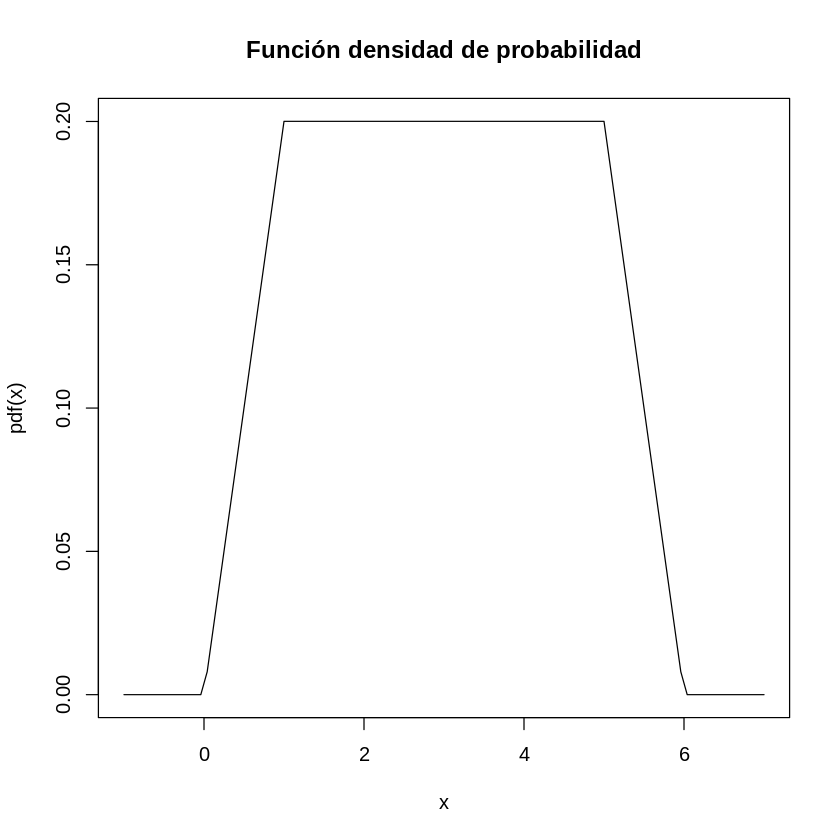

In [39]:
#::GMG::Dibujo la pdf
curve(expr = pdf.X(1/4.9989,x),
      from = -1, to = 7,
      xlab = 'x', ylab = 'pdf(x)')
title('Función densidad de probabilidad')

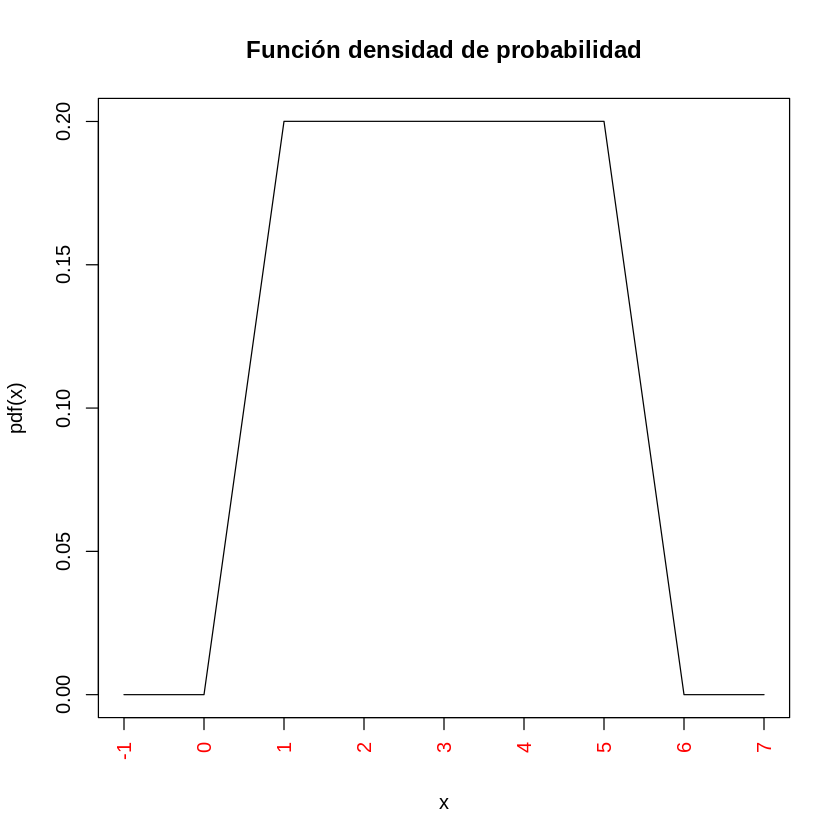

In [60]:
#::GMG::Alternativa más difícil con plot (hay que poner bien la escala en el eje X)
# https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/axis.html
x <- seq(-1,7)
plot(pdf.X(1/4.9989,x), type = 'l',
     xlab = 'x', ylab = 'pdf(x)', xaxt='n',
     main = 'Función densidad de probabilidad')
axis(1,at=seq(1,9),labels=c(-1:7), col.axis="red", las=2,)

ii) Calcula P (X < 1), P (X ≤ 1), P (0 < X ≤ 3)

**::GMG::** Para X rv continua:

$P\left(X \leq a\right) = P\left(X < a\right)$

Los cálculos que hay que hacer con la pdf (área bajo la curva) son los siguientes:

$ P \left( X < 1 \right) = P \left( X \leq 1 \right) = P \left( -\infty < X < 1 \right) = \int_{0}^{1} f(x) dx$

$ P \left( 0 < X \leq 3 \right) = P \left( 0 \leq X \leq 3 \right) = \int_{0}^{3} f(x) dx$


**Referencia** Apuntes de estadística, capítulo 3, apartado 3.9. Función densidad de probabilidad, pp. 20

In [63]:
#::GMG::Asumimos que X es rv continua y usamos la pdf
paste('𝑃(𝑋 < 1) = 𝑃(𝑋 ≤ 1)=', 
      round(integrate(f = pdf.X,lower = 0, upper = 1, h = 1/4.9989)$value, 5),
       'y 𝑃(0 < 𝑋 ≤ 3) = 𝑃(0 ≤ 𝑋 ≤ 3)=', 
      round(integrate(f = pdf.X,lower = 0, upper = 3, h = 1/4.9989)$value,5))

[1] "𝑃(𝑋 < 1) = 𝑃(𝑋 ≤ 1)= 0.10002 y 𝑃(0 < 𝑋 ≤ 3) = 𝑃(0 ≤ 𝑋 ≤ 3)= 0.50011"

iii) ¿Cuánto vale E(X)?

**::GMG::** Apuntes Estadística (pdf), Capítulo 3, apartado 3.10 Media o esperanza matemática de una variable aleatoria

$E\left( X \right) = \int_{-\infty}^{\infty} x f(x) dx = \int_{0}^{6} x f(x) dx$

In [66]:
#::GMG::Ponemos por separado el integrando
integrando <- function(x) {
    x*pdf.X(1/4.9989,x)
}
paste('E(X)=', round(integrate(f = integrando, lower = 0, upper = 6)$value, 5))

[1] "E(X)= 3.00066"

### Problema 4 

*El colesterol se mide en una población con media 180 mg/dL y desviacón típica 25 mg/dL.*

**::GMG::** Asumo distribución normal, con $\mu = 180 mg/dL$ y $\sigma = 25 mg/dL$: 

$$X \sim {\sf Normal}(\mu, \sigma)$$

**::GMG::** Referencia, apuntes de estadística Capítulo 4, apartado 4.6, pp. 30-31

Comandos de R: `dnorm` (pdf), `pnorm` (cdf), `qnorm` (inversa cdf), `rnorm` (sim)

In [1]:
mu <- 180 # mg/dL
sigma <- 25 # mg/dL

i)  Calcula la probabilidad de que una persona tenga más de 225 mg/dL de colesterol en sangre.

In [5]:
p_mas_de <- 1 - pnorm(q = 225, mean = mu, sd = sigma)
paste("Probabilidad de que una persona tenga más de 225 mg/dL: ", 
            round(p_mas_de,3)
     )

[1] "Probabilidad de que una persona tenga más de 225 mg/dL:  0.036"

ii)  Calcula el percentil del 95% de colesterol en sangre en dicha población.

In [8]:
percentil <- 0.95
paste('El percentil 0.95 de colesterol en sangre de la población es:',
     round(qnorm(p = percentil,mean = mu,sd = sigma),3))

[1] "El percentil 0.95 de colesterol en sangre de la población es: 221.121"

iii) Representa la función de densidad y la función de distribución en una gráfica con dos paneles.

In [9]:
xseq <- seq(0,12*sigma,.5)
dens <- dnorm(x = xseq,mean = mu,sd = sigma)
dist <- pnorm(q = xseq,mean = mu,sd = sigma)

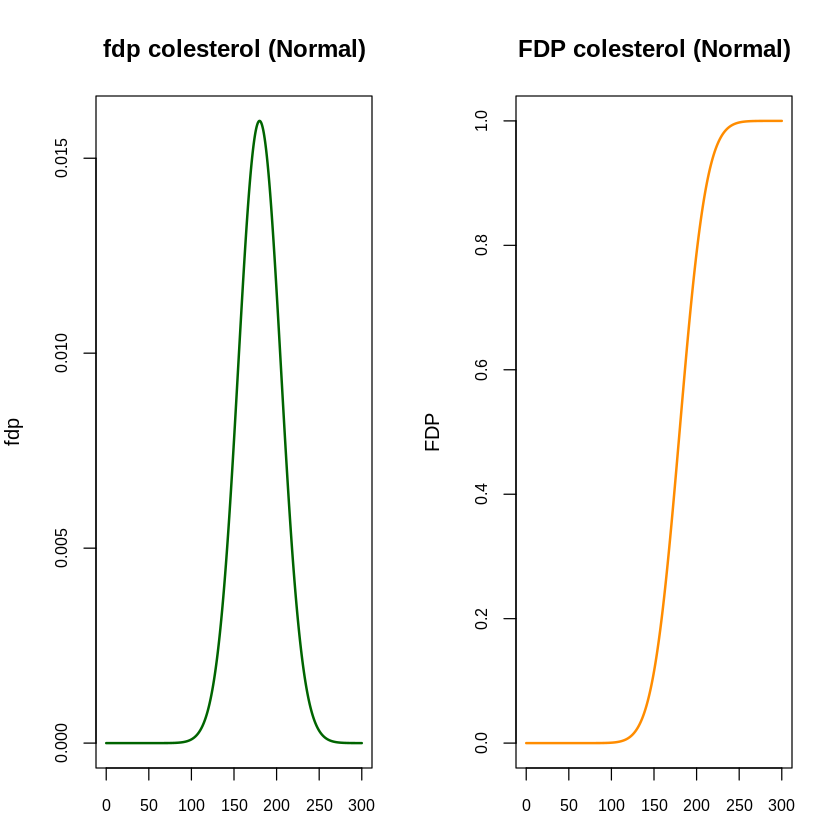

In [10]:
par(mfrow=c(1,2), mar=c(3,4,4,2))
plot(xseq, dens, col="darkgreen",
     xlab="", ylab="fdp", 
     type="l",lwd=2, cex=2, 
     main="fdp colesterol (Normal)", cex.axis=.8)
plot(xseq, dist, col="darkorange", 
     xlab="", ylab="FDP",
     type="l",lwd=2, cex=2, 
     main="FDP colesterol (Normal)", cex.axis=.8)

iv) ¿Cuánto valen E(X) y SD(X)?

In [12]:
#::GMG::Según la teoría E(X) es la media poblacional 
#       y SD(X) es la desviación típica poblacional, y ambos parámetros nos han sido dados
#       como datos iniciales del problema:
paste('E(X) =', mu, 'mg/dL y SD(X) =', sigma, 'mg/dL')

[1] "E(X) = 180 mg/dL y SD(X) = 25 mg/dL"